# Playground to test and learn about the Fuzzy theory and application

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedente

In [3]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

# Consequente

In [4]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

## Funções de Pertinência

/Users/brunomaciel/tensorflow-test/env_tf/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


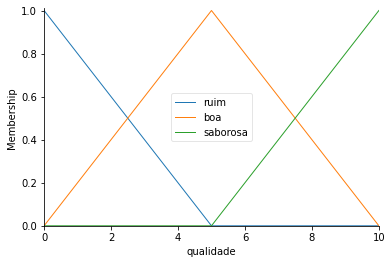

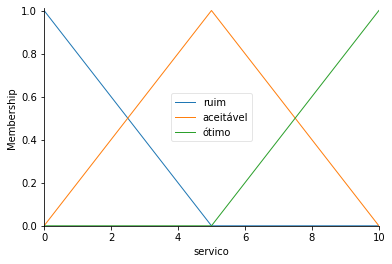

In [5]:
qualidade.automf(names=['ruim', 'boa', 'saborosa'])
qualidade.view()
servico.automf(names=['ruim', 'aceitável', 'ótimo'])
servico.view()

/Users/brunomaciel/tensorflow-test/env_tf/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


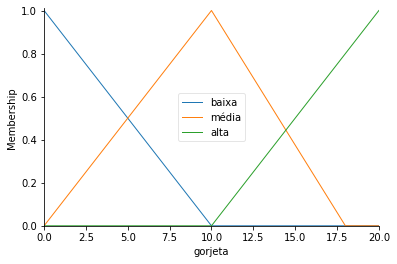

In [18]:
# Função Triangular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10])
gorjeta['média'] = fuzz.trimf(gorjeta.universe, [0, 10,18])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20])
gorjeta.view()

In [22]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['média'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de Controle

In [23]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])
sistema = ctrl.ControlSystemSimulation(sistema_controle)
sistema.input['qualidade'] = 8.5
sistema.input['servico'] = 6.5
sistema.compute()

11.47364270548984


/Users/brunomaciel/tensorflow-test/env_tf/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


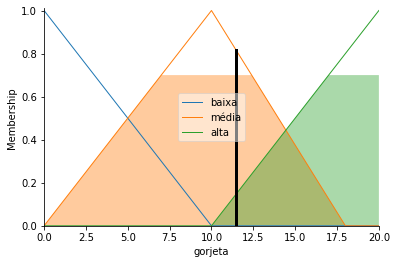

In [25]:
print(sistema.output['gorjeta'])
gorjeta.view(sim= sistema)